# Content Decription

Customer Churn Prediction: 

A Bank wants to take care of customer retention for its product: savings accounts. The bank wants you to identify customers likely to churn balances below the minimum balance. You have the customers information such as age, gender, demographics along with their transactions with the bank. Your task as a data scientist would be to predict the propensity to churn for each customer.

Data Dictionary:

There are multiple variables in the dataset which can be cleanly divided into 3 categories:
I. Demographic information about customers
• customer_id - Customer id
• vintage - Vintage of the customer with the bank in a number of days
• age - Age of customer
• gender - Gender of customer
• dependents - Number of dependents
• occupation - Occupation of the customer
• city - City of the customer (anonymized)
II. Customer Bank Relationship
• customer_nw_category - Net worth of customer (3: Low , 2: Medium , 1: High)
• branch_code - Branch Code for a customer account
• days_since_last_transaction - No of Days Since Last Credit in Last 1 year
III. Transactional Information
• current_balance - Balance as of today
• previous_month_end_balance - End of Month Balance of previous month
• average_monthly_balance_prevQ - Average monthly balances (AMB) in Previous Quarter
• average_monthly_balance_prevQ2 - Average monthly balances (AMB) in previous to the previous quarter
• current_month_credit - Total Credit Amount current month
• previous_month_credit - Total Credit Amount previous month
• current_month_debit - Total Debit Amount current month
• previous_month_debit - Total Debit Amount previous month
• current_month_balance - Average Balance of current month
• previous_month_balance - Average Balance of previous month
• churn - Average balance of customer falls below minimum balance in the next quarter (1/0)

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
#Reading the file
data = pd.read_csv("churn_prediction.csv")
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [31]:
data.shape

(28382, 21)

In [32]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

Our datatset looks to have some null values .

The gender Column has 525 missing values.
The dependents Column has 2463 missing values.
The occupation column has 80 missing values.
The city column has 803 missing values.
The days_since_last_transaction column has 3223 missing values.
Now Let us look at the data types of the columns in our datatset.

In [33]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

This doesn't exactly gives us the idea about how many categorical as well as continous variables are present in the datatset. Le's try by looking at the unique counts of each columns.

In [28]:
# Checking the type of variables : categorical or continous
temp = pd.DataFrame(index=data.columns)
temp['data_type'] = data.dtypes
temp['null_count'] = data.isnull().sum()
temp['unique_count'] = data.nunique()
temp

,data_type,null_count,unique_count
Date,object,0,3436
Location,object,0,49
MinTemp,float64,637,389
MaxTemp,float64,322,505
Rainfall,float64,1406,679
Evaporation,float64,60843,356
Sunshine,float64,67816,145
WindGustDir,object,9330,16
WindGustSpeed,float64,9270,67
WindDir9am,object,10013,16


So , Acoording to above our

Categorical Variables are : -
gender , dependents , occupation , customer_nw_category , churn
and the rest can be classfified as continuos variables as for now.

In [29]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


Let's first look at how our data is distributed .

# Univariate Analysis

In [8]:
#Days Since Last Transaction
data['days_since_last_transaction'].plot.hist(bins=50)
plt.xlabel('Days Since Last Transaction', fontsize=12)

KeyError: 'days_since_last_transaction'

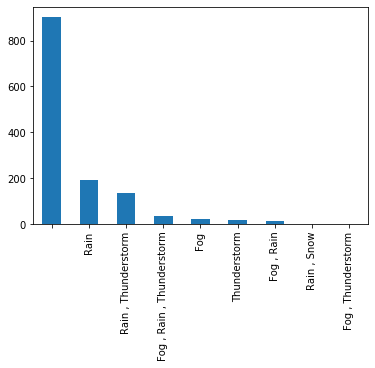

In [9]:
#Gender
data['gender'].value_counts().plot(kind = 'bar')

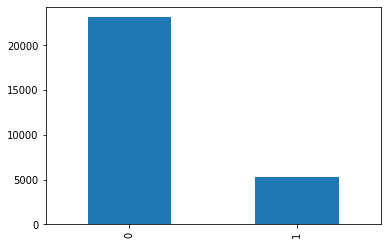

In [17]:
#Churn
data['churn'].value_counts().plot(kind = 'bar')

In [10]:
#Occupation
data['occupation'].value_counts()

KeyError: 'occupation'

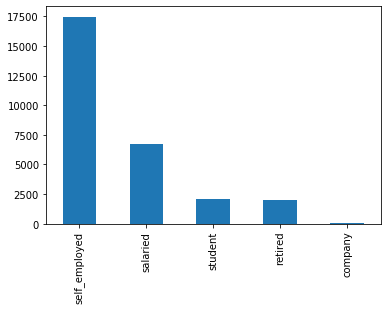

In [19]:
data['occupation'].value_counts().plot(kind = 'bar')

In [11]:
#Dependents
data['dependents'].value_counts()

KeyError: 'dependents'

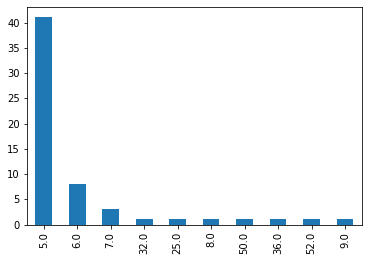

In [21]:
(data['dependents'].loc[data['dependents']>=5.0].value_counts()).plot(kind = 'bar')

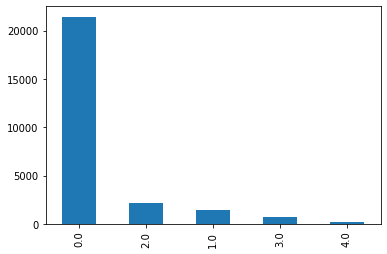

In [22]:
(data['dependents'].loc[data['dependents']<5.0].value_counts()).plot(kind = 'bar')

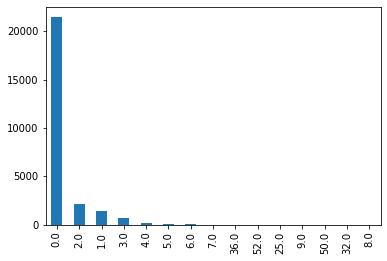

In [23]:
data['dependents'].value_counts().plot(kind = 'bar')

Maximum Customers have 0 dependents

# Treating Missing Values

In [24]:
#Treating Missing Values
data['days_since_last_transaction'].isnull().sum()

3223

There are 3223 missing values in this column. Before imputing values , let's first observe what type of data can be imputed .

In [25]:
data['days_since_last_transaction'].describe()

count    25159.000000
mean        69.997814
std         86.341098
min          0.000000
25%         11.000000
50%         30.000000
75%         95.000000
max        365.000000
Name: days_since_last_transaction, dtype: float64

In [26]:
data['days_since_last_transaction'].loc[data['churn']==0].dropna().mean()

72.38677096742252

In [27]:
data['days_since_last_transaction'].loc[data['churn']==1].dropna().mean()

60.27151783914533

In [28]:
# average dormant time for each occupational category
data.pivot_table(values='days_since_last_transaction', index='occupation', aggfunc='mean')

,days_since_last_transaction
occupation,
company,72.029412
retired,68.125490
salaried,62.867931
self_employed,70.655480
student,92.476278


In [29]:
# DIvivding positive and negative churn data
positive_churn=data.loc[data['churn']==1]
negative_churn=data.loc[data['churn']==0]

In [30]:
pos=positive_churn.pivot_table(values='days_since_last_transaction', index='occupation', aggfunc='median')

In [31]:
neg=negative_churn.pivot_table(values='days_since_last_transaction', index='occupation', aggfunc='median')

In [32]:
temp_pos=pos['days_since_last_transaction'].tolist()
temp_neg=neg['days_since_last_transaction'].tolist()# function to Imputing values

def impute(x):
    if x['churn']==0:
        if x['occupation']=='company':
            return temp_neg[0]
        elif x['occupation']=='retired':
            return temp_neg[1]
        elif x['occupation']=='salaried':
            return temp_neg[2]
        elif x['occupation']=='self_employed':
            return temp_neg[3]
        elif x['occupation']=='student':
            return temp_neg[4]
        else :
            return (sum(temp_neg)/len(temp_neg))
    elif x['churn']==1:
        if x['occupation']=='company':
            return temp_pos[0]
        elif x['occupation']=='retired':
            return temp_pos[1]
        elif x['occupation']=='salaried':
            return temp_pos[2]
        elif x['occupation']=='self_employed':
            return temp_pos[3]
        elif x['occupation']=='student':
            return temp_pos[4]
        else :
            return (sum(temp_pos)/len(temp_pos))

In [33]:
# Now to apply the function 
data['days_since_last_transaction'] =  data.apply(lambda x: impute(x) if pd.isnull(x['days_since_last_transaction']) else x['days_since_last_transaction'], axis=1)

Now to check the values imputed correctly or not

In [34]:
data['days_since_last_transaction'].isnull().sum()

0

In [35]:
data[data['days_since_last_transaction'].isnull()]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn


Great looks like our last_transaction column is free from any null values

In [36]:
#Dependents
#The datatype of dependents is float . Let's convert it into object type.
data = data.astype({'dependents':'object','customer_nw_category':'object'})

In [37]:
data.groupby(['dependents', 'churn']).dependents.value_counts()

dependents  churn  dependents
0.0         0      0.0           17700
            1      0.0            3735
1.0         0      1.0            1076
            1      1.0             319
2.0         0      2.0            1665
            1      2.0             485
3.0         0      3.0             551
            1      3.0             150
4.0         0      4.0             146
            1      4.0              33
5.0         0      5.0              36
            1      5.0               5
6.0         0      6.0               4
            1      6.0               4
7.0         0      7.0               3
8.0         1      8.0               1
9.0         0      9.0               1
25.0        0      25.0              1
32.0        0      32.0              1
36.0        0      36.0              1
50.0        1      50.0              1
52.0        0      52.0              1
Name: dependents, dtype: int64

In [38]:
data.groupby(['occupation','churn']).dependents.value_counts()

occupation     churn  dependents
company        0      0.0              28
                      2.0               2
                      1.0               1
                      3.0               1
               1      0.0               3
retired        0      0.0            1503
                      2.0              56
                      1.0              53
                      3.0               8
                      4.0               5
                      5.0               1
               1      0.0             259
                      1.0              12
                      2.0               9
                      3.0               2
                      4.0               2
salaried       0      0.0            4239
                      2.0             458
                      1.0             358
                      3.0             180
                      4.0              32
                      5.0              12
                      6.0               2
 

In [39]:
# Recall positive_churn and negative_churn in previous section

pd.crosstab(positive_churn['dependents'],positive_churn['occupation'])

occupation,company,retired,salaried,self_employed,student
dependents,,,,,
0.0,3,259,804,2387,276
1.0,0,12,103,198,3
2.0,0,9,123,349,4
3.0,0,2,42,106,0
4.0,0,2,8,23,0
5.0,0,0,1,4,0
6.0,0,0,0,4,0
8.0,0,0,0,1,0
50.0,0,0,1,0,0


In [40]:
pd.crosstab(negative_churn['dependents'],negative_churn['occupation'])

occupation,company,retired,salaried,self_employed,student
dependents,,,,,
0.0,28,1503,4239,10390,1493
1.0,1,53,358,648,11
2.0,2,56,458,1143,4
3.0,1,8,180,361,0
4.0,0,5,32,109,0
5.0,0,1,12,23,0
6.0,0,0,2,2,0
7.0,0,0,0,3,0
9.0,0,0,0,1,0


In [41]:
(data['dependents'].loc[data['churn']==1]).median()

0.0

In [42]:
(data['dependents'].loc[data['churn']==0]).median()

0.0

WE tried all possible combinations and observe that maximum of the cutomers have 0 dependents. Hence, we impute the dependents column with the value 0.0

In [43]:
data['dependents'].fillna(value = 0.0 , inplace=True)

In [44]:
#Now to check the values imputed correctly or not
data['dependents'].isnull().sum()

0

In [45]:
#Occupation
data['occupation'].isnull().sum()

80

In [46]:
pd.crosstab(negative_churn['churn'],negative_churn['occupation'])

occupation,company,retired,salaried,self_employed,student
churn,,,,,
0,36,1719,5557,14009,1734


In [47]:
pd.crosstab(positive_churn['churn'],positive_churn['occupation'])

occupation,company,retired,salaried,self_employed,student
churn,,,,,
1,4,305,1147,3467,324


In [48]:
# Function to impute occupation

def impute_occupation(x):
    if x['churn']==1:
        return 'Unemployed'
    else :
        return 'Others'

In [49]:
# Now to apply the function 
data['occupation'] =  data.apply(lambda x: impute_occupation(x) if pd.isnull(x['occupation']) else x['occupation'], axis=1)

In [50]:
#Now to check the values imputed correctly or not
data['occupation'].isnull().sum()

0

In [51]:
#Dropping unecessary rows
#Well , I have decided to remove the gender and city columns to ease the calculations .
data.drop(['gender','city','customer_id'],inplace=True,axis=1)

In [52]:
#Now , the columns have been removed , it is now time to finally check our data and convert it into dummy variables

# Checking the type of variables : categorical or continous
temp = pd.DataFrame(index=data.columns)
temp['data_type'] = data.dtypes
temp['null_count'] = data.isnull().sum()
temp['unique_count'] = data.nunique()
temp

,data_type,null_count,unique_count
vintage,int64,0,5473
age,int64,0,90
dependents,float64,0,15
occupation,object,0,7
customer_nw_category,object,0,3
branch_code,int64,0,3185
days_since_last_transaction,float64,0,363
current_balance,float64,0,27903
previous_month_end_balance,float64,0,27922
average_monthly_balance_prevQ,float64,0,27801


In [34]:
df=pd.get_dummies(data)

In [35]:
df

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_balance,previous_month_balance,churn,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,0.0,187.0,2,755,224.0,1458.71,1458.71,...,1458.71,1458.71,0,0,1,0,0,0,1,0
1,2,310,35,0.0,NaN,2,3214,60.0,5390.37,8704.66,...,6496.78,8787.61,0,0,1,0,0,0,1,0
2,4,2356,31,0.0,146.0,2,41,NaN,3913.16,5815.29,...,5006.28,5070.14,0,0,1,0,0,1,0,0
3,5,478,90,NaN,1020.0,2,582,147.0,2291.91,2291.91,...,2291.91,1669.79,1,0,0,0,0,0,1,0
4,6,2531,42,2.0,1494.0,3,388,58.0,927.72,1401.72,...,1157.15,1677.16,1,0,1,0,0,0,1,0
5,7,263,42,0.0,1096.0,2,1666,60.0,15202.20,16059.34,...,15719.44,15349.75,0,1,0,0,0,0,1,0
6,8,5922,72,0.0,1020.0,1,1,98.0,7006.93,7714.19,...,7076.06,7755.98,0,0,1,0,1,0,0,0
7,9,1145,46,0.0,623.0,2,317,172.0,10096.58,8519.53,...,8563.84,5317.04,0,0,1,0,0,0,1,0
8,10,2132,31,0.0,1096.0,2,4110,19.0,1355.86,1355.86,...,1183.45,1857.42,0,0,1,0,0,1,0,0
9,11,3379,40,3.0,1020.0,2,38,0.0,4957.95,4244.38,...,1823.16,2416.69,0,0,1,0,0,0,1,0


# Logistic Regression
It's time to scale our data

In [36]:
#Normalising using min_max_scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
#Train Test Split
#seperating independent and dependent variables
x = df.drop(['churn'], axis=1)
y = df['churn']

# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 101,test_size=0.2,stratify=y)

In [38]:
cols = train_x.columns
cols

Index(['customer_id', 'vintage', 'age', 'dependents', 'city',
       'customer_nw_category', 'branch_code', 'days_since_last_transaction',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'gender_Female', 'gender_Male',
       'occupation_company', 'occupation_retired', 'occupation_salaried',
       'occupation_self_employed', 'occupation_student'],
      dtype='object')

In [39]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,previous_month_debit,current_month_balance,previous_month_balance,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,-0.635812,1.840327,0.605368,1.69072,0.695412,-0.340571,3.417529,2.702271,-0.065342,-0.056429,...,-0.132299,-0.060820,-0.055827,-0.817771,0.849187,-0.039292,-0.277186,-0.554269,0.789930,-0.281401
1,-1.629495,0.081002,-0.630723,-0.35670,-0.942972,-1.854110,-0.846306,0.605978,-0.163602,-0.120976,...,-0.132306,-0.161947,-0.121370,1.222837,-1.177597,-0.039292,-0.277186,-0.554269,0.789930,-0.281401
2,-0.895302,0.419977,-0.012677,-0.35670,1.489149,-0.340571,-0.906300,-0.776193,-0.146261,-0.142089,...,-0.042606,-0.120692,-0.143216,1.222837,-1.177597,-0.039292,-0.277186,-0.554269,0.789930,-0.281401
3,-1.235454,-1.222844,-2.597231,-0.35670,0.519540,1.172967,-0.921298,-0.661012,-0.105219,-0.131421,...,-0.132303,-0.119411,-0.129603,-0.817771,0.849187,-0.039292,-0.277186,-0.554269,-1.265935,3.553653
4,-1.002050,2.230117,-1.136397,-0.35670,0.519540,-1.854110,-0.972721,-0.776193,-0.151772,-0.153334,...,1.874440,-0.158027,-0.155136,1.222837,-1.177597,-0.039292,-0.277186,1.804178,-1.265935,-0.281401


In [40]:
test_x_scaled = scaler.fit_transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=cols)
test_x_scaled.head()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,previous_month_debit,current_month_balance,previous_month_balance,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1.113256,-0.579518,0.945016,1.539673,-1.359872,-0.345171,1.934832,-0.763676,-0.214152,0.021883,...,0.245839,-0.052442,0.191971,-0.798398,0.831623,-0.02969,-0.276797,-0.563449,0.79014,-0.272346
1,-1.101521,0.917333,-0.512231,-0.318085,0.682488,1.171497,-0.950125,-0.479141,-0.214351,0.075813,...,-0.123186,-0.208486,-0.106479,-0.798398,0.831623,-0.02969,-0.276797,-0.563449,0.79014,-0.272346
2,-1.696461,0.908557,-0.063847,0.610794,0.244184,-0.345171,1.596473,-0.514708,-0.064642,-0.065274,...,-0.179831,-0.067228,-0.068622,-0.798398,0.831623,-0.02969,-0.276797,-0.563449,0.79014,-0.272346
3,-1.488951,-1.314780,-0.400135,-0.318085,-1.497560,-0.345171,3.381501,-0.656975,0.001609,-0.061135,...,-0.179343,-0.039010,-0.072346,-0.798398,0.831623,-0.02969,-0.276797,-0.563449,0.79014,-0.272346
4,0.410228,0.040409,-0.848519,-0.318085,-1.497560,1.171497,1.512669,NaN,-0.041856,-0.048958,...,-0.185605,-0.047986,-0.056697,1.252509,-1.202468,-0.02969,-0.276797,-0.563449,0.79014,-0.272346


# Implementing Logistic Regression

In [18]:
#importing Logistic Regression and metric F1-score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

In [19]:
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

NameError: name 'train_x' is not defined

In [62]:
# Predicting over the Train
train_predict = logreg.predict(train_x)
train_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
# Calculating f1-score
k = f1_score(train_predict, train_y)
print('Training f1_score', k )

Training f1_score 0.194162699234113


In [64]:
# Predicting over the Test Set and f1-score
test_predict = logreg.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test f1_score', k )

Test f1_score 0.1902398676592225


## Random Forest

In [65]:
#Importing random forest classifier 
from sklearn.ensemble import RandomForestClassifier

In [66]:
#creating a random forest instance
clf = RandomForestClassifier(random_state=101,n_estimators=15)

In [67]:
#train the model
clf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [68]:
#score on training data
clf.score(train_x, train_y)

0.9940101299273287

In [69]:
#score on test data
clf.score(test_x, test_y)

0.8617227408842698

Hence , Our Conclusion is Random Forest is a better classifier

## DecisionTree

In [70]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [71]:
# how to import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [72]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [73]:
#fitting the model
dt_model.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [75]:
#checking the training score
dt_model.score(train_x, train_y)

1.0

In [76]:
#checking the validation score
dt_model.score(test_x, test_y)

0.7951382772591157

In [78]:
#predictions on validation set
dt_model.predict(test_x)

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)